<a href="https://colab.research.google.com/github/ajuelias13/assignment-1/blob/main/Week_10_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Week 10 Learning Assignment
1. Download WineQT.csv
2. Load and Inspect the Data
3. Clean or Prepare the Data (remove duplicates, handle missing values, etc.)
4. Prepare the Data for Modeling (splitting features and labels)
5. Build and Train the Model
6. Make Predictions
7. Evaluate Model Accuracy
7. Take a screenshot of your final predictions and results

In [70]:
# For data Manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [71]:
# Import datasets
df = pd.read_csv('/content/drive/MyDrive/WineQT.csv')

In [72]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [73]:
#Displaying the first few rows

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [74]:
#Displaying the last few rows

df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [75]:
#Getting the shape of the DataFrame

df.shape

(1143, 13)

There are **1143** rows and **13** columns present in the dataset

In [76]:
# Displaying information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [77]:
# Summary of Numerical variables
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [78]:
# Checking for missing values

df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#Model Development

In [79]:
# Features (all columns except 'quality')
X = df.drop('quality', axis=1)

# Labels (the 'quality' column)
y = df['quality']

In [80]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Selection and Training

In [81]:
# Creating a Random Forest Classifier object
rf_classifier = RandomForestClassifier(random_state=42)

In [82]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [84]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6812227074235808

Accuracy: The overall proportion of correctly classified instances = 0.6812

In [85]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.6637026488594935

Precision: The proportion of correctly predicted positive instances among all instances predicted as positive = 0.6637

In [86]:
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall

0.6812227074235808

Recall: The proportion of correctly predicted positive instances among all actual positive instances = 0.6812

In [87]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
f1

0.6704433263717486

F1-Score: The harmonic mean of precision and recall, providing a balanced measure of performance = 0.6704

In [88]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

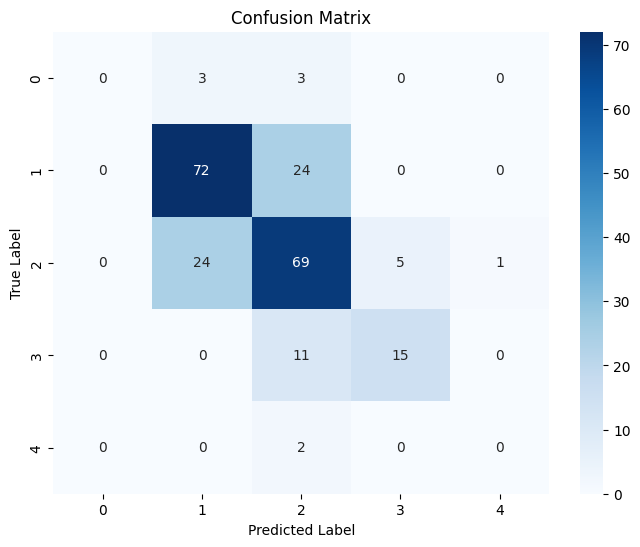

In [89]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [90]:
# Generate classification report
reports = classification_report(y_test, y_pred, output_dict=True)
reports

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0},
 '5': {'precision': 0.7272727272727273,
  'recall': 0.75,
  'f1-score': 0.7384615384615385,
  'support': 96.0},
 '6': {'precision': 0.6330275229357798,
  'recall': 0.696969696969697,
  'f1-score': 0.6634615384615384,
  'support': 99.0},
 '7': {'precision': 0.75,
  'recall': 0.5769230769230769,
  'f1-score': 0.6521739130434783,
  'support': 26.0},
 '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
 'accuracy': 0.6812227074235808,
 'macro avg': {'precision': 0.4220600500417014,
  'recall': 0.4047785547785548,
  'f1-score': 0.4108193979933111,
  'support': 229.0},
 'weighted avg': {'precision': 0.6637026488594935,
  'recall': 0.6812227074235808,
  'f1-score': 0.6704433263717486,
  'support': 229.0}}